### pan-cancer statistical analysis

#### read in data
8678 case sample and 535 normal samples from TCGA

In [1]:
tumor<-read.table("data/JCI121476.sdt12.txt",header=T)

In [1]:
load("data/TCGA_tumor_herv_expr.Rdata")

In [4]:
dim(tumor)
tumor[1:4,]

[1]  281 3174

Sample_ID       herv_3301 herv_5149 herv_2568 herv_1313
TCGA_3L_AA1B_01 TCGA_3L_AA1B_01 1.832602  0.7171788 0.1558495 2.254695 
TCGA_4N_A93T_01 TCGA_4N_A93T_01 1.780041  0.9004381 0.3351539 2.039795 
TCGA_4T_AA8H_01 TCGA_4T_AA8H_01 1.841034  0.7185481 0.2771765 1.563185 
TCGA_5M_AAT4_01 TCGA_5M_AAT4_01 1.891814  0.6540933 0.2567129 2.335229 
                herv_5574 herv_5234   herv_3820 herv_1641  herv_4846  ⋯
TCGA_3L_AA1B_01 0.2748030 0.026679791 0         0.00000000 0.02295912 ⋯
TCGA_4N_A93T_01 0.2821053 0.007308381 0         0.00000000 0.08904791 ⋯
TCGA_4T_AA8H_01 0.4421450 0.400979524 0         0.03661633 0.07649358 ⋯
TCGA_5M_AAT4_01 0.2247948 0.055719532 0         0.00000000 0.00000000 ⋯
                herv_4259 herv_490  herv_920 herv_1646  herv_1454 herv_4716
TCGA_3L_AA1B_01 0.6692707 0.7083959 0        0.02826650 2.570494  0.9482224
TCGA_4N_A93T_01 0.1066569 0.5120331 0        0.02460446 2.725295  1.4970817
TCGA_4T_AA8H_01 0.1932235 0.2433925 0        0.00000000 2.650576  0.7160104
TCGA_5M_AAT4_01 0.1219256 0.7063634 0        0.15693905 2.430042  0.9215520
                herv_3475 herv_1779  herv_5343 herv_5410
TCGA_3L_AA1B_01 0.3250625 0.04487518 0.2764931 2.017158 
TCGA_4N_A93T_01 0.3187766 0.04393752 0.3607057 2.614792 
TCGA_4T_AA8H_01 0.3729630 0.11827916 0.2931214 1.403345 
TCGA_5M_AAT4_01 0.1819263 0.00000000 0.1568664 2.212693

knowing that herv_expression in LAML and STAD samples (all from project AB and CG & BR) is uncommonly low,so excluded in later analysis,8470 tumor case left

In [76]:
normal<-read.table("data/normalized_normal_534.csv",sep=",",header=T)
dim(normal)
normal[1:4,]

[1]  534 3174

FileID                               herv_1002  herv_1004  herv_1007 
1 efca1810-e853-4f89-a954-69018ff62ec9 0.42874986 0.00000000 0.00000000
2 eb258c90-d4c6-49c2-872a-1a6e51258b5f 0.05547057 0.00000000 0.00000000
3 ea99fa21-e7aa-47b9-917c-4055fb714430 0.52663553 0.03286685 0.01652702
4 ea422934-ce35-4f36-b452-5745b2b3c1d0 0.00000000 0.00000000 0.00000000
  herv_1008  herv_1011  herv_1012  herv_1013  herv_1014  herv_1017 ⋯ herv_988  
1 0.02084845 0.00000000 0.08164486 0.04160212 1.98498050 0         ⋯ 0.13424077
2 0.01406884 0.00000000 0.08242610 0.01406884 1.43270617 0         ⋯ 0.00000000
3 0.04930371 0.01652702 0.22998512 0.00000000 1.77111780 0         ⋯ 0.03363207
4 0.00000000 0.00000000 0.00000000 0.00000000 0.07288067 0         ⋯ 0.00000000
  herv_989 herv_990 herv_991   herv_992 herv_994   herv_995   herv_996  
1 0        0        0.12079756 2.187531 0.08559642 0.04154356 0.04466298
2 0        0        0.01406884 1.810586 0.01481808 0.00000000 0.07465841
3 0        0        0.14233986 2.106293 0.22291407 0.02207601 0.05024617
4 0        0        0.00000000 0.000000 0.00000000 0.00000000 0.00000000
  herv_997 herv_999  
1 0        0.21660905
2 0        0.00000000
3 0        0.08080447
4 0        0.00000000

### only deal with COAD sample

In [38]:
row.names(tumor)<-tumor$Sample_ID
tumor<-tumor[c('TCGA_3L_AA1B_01','TCGA_4N_A93T_01','TCGA_4T_AA8H_01','TCGA_5M_AAT4_01','TCGA_5M_AAT5_01','TCGA_5M_AAT6_01','TCGA_5M_AATA_01','TCGA_5M_AATE_01','TCGA_A6_2675_01','TCGA_A6_2685_01','TCGA_A6_2686_01','TCGA_A6_4105_01','TCGA_A6_5656_01','TCGA_A6_5657_01','TCGA_A6_5659_01','TCGA_A6_5660_01','TCGA_A6_5661_01','TCGA_A6_5662_01','TCGA_A6_5664_01','TCGA_A6_5665_01','TCGA_A6_5666_01','TCGA_A6_5667_01','TCGA_A6_6137_01','TCGA_A6_6138_01','TCGA_A6_6140_01','TCGA_A6_6141_01','TCGA_A6_6142_01','TCGA_A6_6648_01','TCGA_A6_6649_01','TCGA_A6_6650_01','TCGA_A6_6651_01','TCGA_A6_6652_01','TCGA_A6_6653_01','TCGA_A6_6654_01','TCGA_A6_6780_01','TCGA_A6_6781_01','TCGA_A6_6782_01','TCGA_A6_A565_01','TCGA_A6_A566_01','TCGA_A6_A567_01','TCGA_A6_A56B_01','TCGA_A6_A5ZU_01','TCGA_AA_3489_01','TCGA_AA_3492_01','TCGA_AA_3495_01','TCGA_AA_3496_01','TCGA_AA_3506_01','TCGA_AA_3509_01','TCGA_AA_3511_01','TCGA_AA_3526_01','TCGA_AA_3655_01','TCGA_AA_3660_01','TCGA_AA_3662_01','TCGA_AA_3663_01','TCGA_AA_3675_01','TCGA_AA_3685_01','TCGA_AA_3697_01','TCGA_AA_3712_01','TCGA_AA_3713_01','TCGA_AA_A01Z_01','TCGA_AA_A02K_01','TCGA_AA_A02Y_01','TCGA_AD_5900_01','TCGA_AD_6548_01','TCGA_AD_6888_01','TCGA_AD_6889_01','TCGA_AD_6890_01','TCGA_AD_6895_01','TCGA_AD_6899_01','TCGA_AD_6901_01','TCGA_AD_6963_01','TCGA_AD_6964_01','TCGA_AD_6965_01','TCGA_AD_A5EJ_01','TCGA_AD_A5EK_01','TCGA_AM_5820_01','TCGA_AM_5821_01','TCGA_AU_3779_01','TCGA_AU_6004_01','TCGA_AY_5543_01','TCGA_AY_6196_01','TCGA_AY_6197_01','TCGA_AY_6386_01','TCGA_AY_A54L_01','TCGA_AY_A69D_01','TCGA_AY_A71X_01','TCGA_AY_A8YK_01','TCGA_AZ_4315_01','TCGA_AZ_4323_01','TCGA_AZ_4614_01','TCGA_AZ_4615_01','TCGA_AZ_4616_01','TCGA_AZ_4682_01','TCGA_AZ_4684_01','TCGA_AZ_5403_01','TCGA_AZ_5407_01','TCGA_AZ_6598_01','TCGA_AZ_6599_01','TCGA_AZ_6600_01','TCGA_AZ_6601_01','TCGA_AZ_6603_01','TCGA_AZ_6605_01','TCGA_AZ_6606_01','TCGA_AZ_6607_01','TCGA_AZ_6608_01','TCGA_CA_5254_01','TCGA_CA_5255_01','TCGA_CA_5256_01','TCGA_CA_5796_01','TCGA_CA_5797_01','TCGA_CA_6715_01','TCGA_CA_6716_01','TCGA_CA_6717_01','TCGA_CA_6718_01','TCGA_CA_6719_01','TCGA_CK_4947_01','TCGA_CK_4948_01','TCGA_CK_4950_01','TCGA_CK_4951_01','TCGA_CK_4952_01','TCGA_CK_5912_01','TCGA_CK_5913_01','TCGA_CK_5914_01','TCGA_CK_5915_01','TCGA_CK_5916_01','TCGA_CK_6746_01','TCGA_CK_6747_01','TCGA_CK_6748_01','TCGA_CK_6751_01','TCGA_CM_4743_01','TCGA_CM_4744_01','TCGA_CM_4747_01','TCGA_CM_4751_01','TCGA_CM_5344_01','TCGA_CM_5348_01','TCGA_CM_5349_01','TCGA_CM_5860_01','TCGA_CM_5861_01','TCGA_CM_5862_01','TCGA_CM_5863_01','TCGA_CM_5864_01','TCGA_CM_5868_01','TCGA_CM_6161_01','TCGA_CM_6162_01','TCGA_CM_6163_01','TCGA_CM_6164_01','TCGA_CM_6165_01','TCGA_CM_6166_01','TCGA_CM_6167_01','TCGA_CM_6168_01','TCGA_CM_6169_01','TCGA_CM_6170_01','TCGA_CM_6171_01','TCGA_CM_6172_01','TCGA_CM_6674_01','TCGA_CM_6675_01','TCGA_CM_6676_01','TCGA_CM_6677_01','TCGA_CM_6678_01','TCGA_CM_6679_01','TCGA_CM_6680_01','TCGA_D5_5537_01','TCGA_D5_5538_01','TCGA_D5_5539_01','TCGA_D5_5540_01','TCGA_D5_5541_01','TCGA_D5_6529_01','TCGA_D5_6530_01','TCGA_D5_6531_01','TCGA_D5_6532_01','TCGA_D5_6533_01','TCGA_D5_6534_01','TCGA_D5_6535_01','TCGA_D5_6536_01','TCGA_D5_6537_01','TCGA_D5_6538_01','TCGA_D5_6539_01','TCGA_D5_6540_01','TCGA_D5_6541_01','TCGA_D5_6898_01','TCGA_D5_6920_01','TCGA_D5_6922_01','TCGA_D5_6923_01','TCGA_D5_6924_01','TCGA_D5_6926_01','TCGA_D5_6927_01','TCGA_D5_6928_01','TCGA_D5_6929_01','TCGA_D5_6930_01','TCGA_D5_6931_01','TCGA_D5_6932_01','TCGA_D5_7000_01','TCGA_DM_A0X9_01','TCGA_DM_A0XD_01','TCGA_DM_A0XF_01','TCGA_DM_A1D0_01','TCGA_DM_A1D4_01','TCGA_DM_A1D6_01','TCGA_DM_A1D7_01','TCGA_DM_A1D8_01','TCGA_DM_A1D9_01','TCGA_DM_A1DA_01','TCGA_DM_A1DB_01','TCGA_DM_A1HA_01','TCGA_DM_A1HB_01','TCGA_DM_A280_01','TCGA_DM_A282_01','TCGA_DM_A285_01','TCGA_DM_A288_01','TCGA_DM_A28A_01','TCGA_DM_A28C_01','TCGA_DM_A28E_01','TCGA_DM_A28F_01','TCGA_DM_A28G_01','TCGA_DM_A28H_01','TCGA_DM_A28K_01','TCGA_DM_A28M_01','TCGA_F4_6459_01','TCGA_F4_6460_01','TCGA_F4_6461_01','TCGA_F4_6463_01','TCGA_F4_6569_01','TCGA_F4_6570_01','TCGA_F4_6703_01','TCGA_F4_6704_01','TCGA_F4_6805_01','TCGA_F4_6806_01','TCGA_F4_6807_01','TCGA_F4_6808_01','TCGA_F4_6809_01','TCGA_F4_6854_01','TCGA_F4_6855_01','TCGA_F4_6856_01','TCGA_G4_6293_01','TCGA_G4_6294_01','TCGA_G4_6295_01','TCGA_G4_6297_01','TCGA_G4_6298_01','TCGA_G4_6299_01','TCGA_G4_6302_01','TCGA_G4_6303_01','TCGA_G4_6304_01','TCGA_G4_6306_01','TCGA_G4_6307_01','TCGA_G4_6309_01','TCGA_G4_6310_01','TCGA_G4_6311_01','TCGA_G4_6314_01','TCGA_G4_6315_01','TCGA_G4_6317_01','TCGA_G4_6317_02','TCGA_G4_6320_01','TCGA_G4_6321_01','TCGA_G4_6322_01','TCGA_G4_6323_01','TCGA_G4_6586_01','TCGA_G4_6588_01','TCGA_G4_6625_01','TCGA_G4_6626_01','TCGA_G4_6627_01','TCGA_G4_6628_01','TCGA_NH_A50T_01','TCGA_NH_A50U_01','TCGA_NH_A50V_01','TCGA_NH_A5IV_01','TCGA_NH_A6GA_01','TCGA_NH_A6GB_01','TCGA_NH_A6GC_01','TCGA_NH_A8F7_01','TCGA_NH_A8F7_06','TCGA_NH_A8F8_01','TCGA_QG_A5YV_01','TCGA_QG_A5YW_01','TCGA_QG_A5YX_01','TCGA_QG_A5Z1_01','TCGA_QG_A5Z2_01','TCGA_QL_A97D_01','TCGA_RU_A8FL_01','TCGA_SS_A7HO_01','TCGA_T9_A92H_01','TCGA_WS_AB45_01'),]
dim(tumor)
tumor

[1]  281 3174

Sample_ID       herv_3301 herv_5149 herv_2568  herv_1313
TCGA_3L_AA1B_01 TCGA_3L_AA1B_01 1.8326016 0.7171788 0.15584952 2.2546946
TCGA_4N_A93T_01 TCGA_4N_A93T_01 1.7800409 0.9004381 0.33515394 2.0397952
TCGA_4T_AA8H_01 TCGA_4T_AA8H_01 1.8410336 0.7185481 0.27717652 1.5631850
TCGA_5M_AAT4_01 TCGA_5M_AAT4_01 1.8918143 0.6540933 0.25671289 2.3352290
TCGA_5M_AAT5_01 TCGA_5M_AAT5_01 1.7251985 0.6654542 0.17246416 2.6609779
TCGA_5M_AAT6_01 TCGA_5M_AAT6_01 1.8387760 0.5614213 0.16681473 0.3433890
TCGA_5M_AATA_01 TCGA_5M_AATA_01 1.8861209 0.9603423 0.22029218 2.0227621
TCGA_5M_AATE_01 TCGA_5M_AATE_01 1.9192437 0.8389535 0.13997353 2.4474360
TCGA_A6_2675_01 TCGA_A6_2675_01 1.1905365 0.6224860 0.08931041 2.0981321
TCGA_A6_2685_01 TCGA_A6_2685_01 1.4328897 0.5312661 0.11447321 1.4216822
TCGA_A6_2686_01 TCGA_A6_2686_01 1.3493945 0.4672862 0.21446207 0.5980653
TCGA_A6_4105_01 TCGA_A6_4105_01 1.4903311 0.5011759 0.08215384 1.7180880
TCGA_A6_5656_01 TCGA_A6_5656_01 1.6915062 0.8384745 0.35126578 2.3167710
TCGA_A6_5657_01 TCGA_A6_5657_01 1.3353040 0.4903748 0.11528505 1.1959318
TCGA_A6_5659_01 TCGA_A6_5659_01 1.3494559 0.6153031 0.23106429 1.6704820
TCGA_A6_5660_01 TCGA_A6_5660_01 1.2050981 0.5190799 0.16412851 1.5449948
TCGA_A6_5661_01 TCGA_A6_5661_01 0.9992790 0.6002980 0.13777680 0.9852457
TCGA_A6_5662_01 TCGA_A6_5662_01 1.2614182 0.4106349 0.20547820 0.8239759
TCGA_A6_5664_01 TCGA_A6_5664_01 1.2551477 0.4805765 0.16236532 1.5331798
TCGA_A6_5665_01 TCGA_A6_5665_01 1.1732646 0.4131751 0.17314907 1.0205431
TCGA_A6_5666_01 TCGA_A6_5666_01 0.7624124 0.3312476 0.00000000 2.0098246
TCGA_A6_5667_01 TCGA_A6_5667_01 1.1991795 0.6037784 0.09974929 2.0320399
TCGA_A6_6137_01 TCGA_A6_6137_01 1.3353080 0.5071501 0.07563013 2.3623948
TCGA_A6_6138_01 TCGA_A6_6138_01 1.1597534 0.5754757 0.11898905 1.7145533
TCGA_A6_6140_01 TCGA_A6_6140_01 1.2984073 0.5648698 0.21617298 2.6939835
TCGA_A6_6141_01 TCGA_A6_6141_01 1.3920089 0.5895203 0.06169156 1.3931745
TCGA_A6_6142_01 TCGA_A6_6142_01 1.1161558 0.5753173 0.26547090 1.8737293
TCGA_A6_6648_01 TCGA_A6_6648_01 1.1866285 0.4924263 0.12764678 2.2265784
TCGA_A6_6649_01 TCGA_A6_6649_01 1.4403681 0.8609985 0.55618341 2.3783771
TCGA_A6_6650_01 TCGA_A6_6650_01 1.3978840 0.6698657 0.10936657 2.3120011
⋮               ⋮               ⋮         ⋮         ⋮          ⋮        
TCGA_G4_6320_01 TCGA_G4_6320_01 1.706599  0.6451681 0.09005350 2.7347666
TCGA_G4_6321_01 TCGA_G4_6321_01 1.179360  0.4118926 0.11366005 1.5134152
TCGA_G4_6322_01 TCGA_G4_6322_01 1.252333  0.6086293 0.09760443 2.8471555
TCGA_G4_6323_01 TCGA_G4_6323_01 1.397973  0.8139960 0.25134883 2.0967727
TCGA_G4_6586_01 TCGA_G4_6586_01 1.529116  0.5411860 0.07109720 1.0827610
TCGA_G4_6588_01 TCGA_G4_6588_01 1.355014  0.3094099 0.11113205 1.7596870
TCGA_G4_6625_01 TCGA_G4_6625_01 1.454667  0.3403108 0.16795266 2.3847521
TCGA_G4_6626_01 TCGA_G4_6626_01 1.375761  0.7758923 0.14277384 1.8385455
TCGA_G4_6627_01 TCGA_G4_6627_01 1.123957  0.8262114 0.07773703 1.6055202
TCGA_G4_6628_01 TCGA_G4_6628_01 1.181135  0.6623882 0.07137870 1.1948265
TCGA_NH_A50T_01 TCGA_NH_A50T_01 1.383679  0.7017667 0.15051338 1.5810519
TCGA_NH_A50U_01 TCGA_NH_A50U_01 1.797095  0.8843917 0.26505006 2.1513412
TCGA_NH_A50V_01 TCGA_NH_A50V_01 1.650586  0.7090228 0.27980946 1.3959154
TCGA_NH_A5IV_01 TCGA_NH_A5IV_01 1.860099  0.7827561 0.25288430 1.8095843
TCGA_NH_A6GA_01 TCGA_NH_A6GA_01 1.695763  0.7494864 0.28416317 1.3529461
TCGA_NH_A6GB_01 TCGA_NH_A6GB_01 1.403009  0.6350497 0.14358263 1.2935642
TCGA_NH_A6GC_01 TCGA_NH_A6GC_01 2.102486  0.8639949 0.25760956 3.3612128
TCGA_NH_A8F7_01 TCGA_NH_A8F7_01 1.919038  0.6224574 0.45610049 2.3300216
TCGA_NH_A8F7_06 TCGA_NH_A8F7_06 1.853492  0.6398901 0.18718746 2.0267686
TCGA_NH_A8F8_01 TCGA_NH_A8F8_01 1.992363  1.0221570 0.16461266 2.1117251
TCGA_QG_A5YV_01 TCGA_QG_A5YV_01 1.602016  0.6848701 0.17605585 1.6639577
TCGA_QG_A5YW_01 TCGA_QG_A5YW_01 1.503833  0.4803222 0.23340551 1.6990656
TCGA_QG_A5YX_01 TCGA_QG_A5YX_01 1.422353  0.6063956 0.19754537 2.4793451
T

In [39]:
normal<-read.table("data/normalized_normal_coad.csv",sep=",",header=T,check.names=FALSE)
dim(normal)
normal

[1]   30 3174

Sample_ID                            460_chr2:153015-160785
1  18625fe4-3c19-45d9-9d7c-a295fbf83f2e 0.00000000            
2  1bd24aac-6813-42d2-9f98-232f18e39a75 0.12698305            
3  5b225e8b-014b-4407-bc80-8566b10d9103 0.11563467            
4  606e4d3b-f02f-4349-bafa-804180766782 0.14909654            
5  60b762e2-d8e2-4f1c-a005-65a221e035b4 0.00000000            
6  662a73d1-ef4d-482d-b427-7dfbca525571 0.00000000            
7  6e1add3f-e334-413f-a32c-3302f80db15f 0.04508243            
8  7219d9a8-634e-471b-82dd-9316b7b28ff2 0.08879378            
9  7adde6fc-7b62-4f26-b327-d225b429823a 0.02920556            
10 818274b6-5103-4689-9d71-7dbff7ea62d6 0.12550185            
11 823d6de4-51f2-449c-af2f-2b7f3fd028f2 0.00000000            
12 8828647d-29ac-4ef0-9085-96846c5f1731 0.00000000            
13 891d4b89-492a-4fdf-aadb-92e5f3eb2175 0.00000000            
14 8e3f0481-0e27-48aa-a178-9c17c78c05d1 0.00000000            
15 9081de60-839a-4e20-8702-02909e90cc71 0.07658863            
16 a4d598d7-896b-495c-9e6b-fef43193f9e8 0.23767410            
17 afb3c381-bf54-453f-ae30-b0c1fc0e55fc 0.00000000            
18 b92432a8-a44d-4fd6-af1c-a08f5772b73d 0.00000000            
19 c257ee3d-8230-41f3-a5f7-948fd141a900 0.00000000            
20 c77b629b-ae40-450e-8154-f4fc0b6bb6e3 0.00000000            
21 d1f1002d-525b-4b8b-b52f-376bf792d74e 0.00000000            
22 d797d295-bd32-4463-9633-9d6be8690328 0.02123847            
23 dbe71479-abcf-43aa-b32a-3ffab1ed1af4 0.00000000            
24 e3adceb2-6d55-4812-b972-e46d843cb261 0.09622910            
25 e7850bdc-382d-4156-98f0-210b419bf69c 0.00000000            
26 ee631538-5004-4d37-b089-61458c3d638e 0.05651842            
27 f54f934c-181b-4ab7-9837-99c6d6d21875 0.19131159            
28 f61b9cd4-288e-4ab9-8ce9-61691cebbf47 0.00000000            
29 f6997426-b4d8-438a-b6df-00f9b5894cbd 0.00000000            
30 fa5e83a0-4d1d-46fe-9f11-fb4a5bc2a87f 0.12868983            
   461_chr2:3861805-3868930 463_chr2:4105971-4111973 464_chr2:4531700-4538083
1  0.00000000               0.00000000               0.00000000              
2  0.00000000               0.00000000               0.00000000              
3  0.02704485               0.05359203               0.00000000              
4  0.00000000               0.11861926               0.02451693              
5  0.00000000               0.00000000               0.00000000              
6  0.00000000               0.00000000               0.00000000              
7  0.03121690               0.05095420               0.00000000              
8  0.00000000               0.02796692               0.02796692              
9  0.00000000               0.03150179               0.04259189              
10 0.04296582               0.05789646               0.07692516              
11 0.00000000               0.00000000               0.00000000              
12 0.00000000               0.00000000               0.00000000              
13 0.00000000               0.00000000               0.00000000              
14 0.00000000               0.00000000               0.00000000              
15 0.01908077               0.01908077               0.00000000              
16 0.01565213               0.01871645               0.01565213              
17 0.00000000               0.00000000               0.00000000              
18 0.00000000               0.12708969               0.02305582              
19 0.00000000               0.00000000               0.00000000              
20 0.00000000               0.00000000               0.00000000              
21 0.00000000               0.00000000               0.00000000              
22 0.00000000               0.04653768               0.00000000              
23 0.00000000               0.00000000               0.00000000              
24 0.00000000               0.09118444               0.00000000              
25 0.00000000               0.00000000               0.00000000              
26 0.00000000         

#### statistic analysis

In [27]:
# calculate the hervs expressing level for each tummor sample
tumor_expr <- apply(tumor[,-1],1,sum)
tumor_expr[1:2]

TCGA_3L_AA1B_01 TCGA_4N_A93T_01 
       1505.571        1549.529

In [45]:
# calculate the hervs expressing level for each normal sample
normal_expr <- apply(normal[,-1],1,sum)
normal_expr

[1]   5.928181 471.450291 604.678462 789.492209   7.237188   5.992399
 [7] 617.939374 481.017779 548.195680 583.870990  12.642736   5.565784
[13]   6.240981   6.443178 563.070731 572.454519   5.939619 627.049754
[19]   8.076840  11.990826  15.560074 533.386732   9.085391 526.983206
[25]   4.136421 715.829369 697.066839   7.797668   7.070619 676.168574

see herv expr distribution in tumor sample(red) and normal sample(blue)

[1] 230.0947

[1] 307.6636

TCGA_A6_6648_01 
           1266

[1] 6

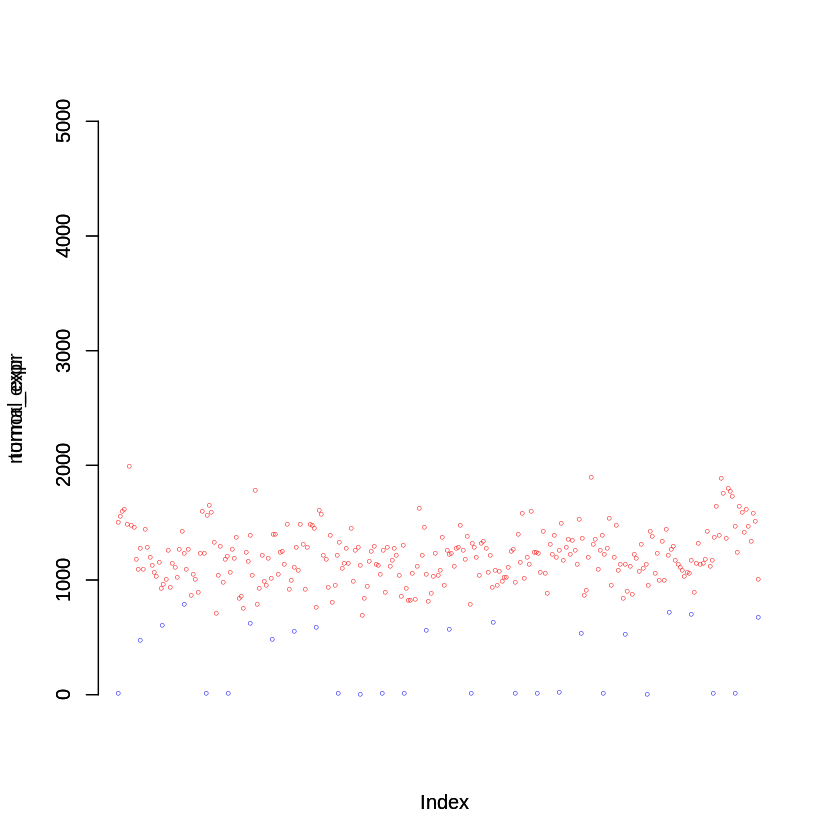

In [29]:
#Standard deviation
sd(tumor_expr)
sd(normal_expr)
#mode
FindMode <- function(x) {
    ux <- unique(x)
    x[which.max(tabulate(match(x, ux)))]
}
FindMode(round(tumor_expr,0))
plot(tumor_expr,pch="。",col="red",ylim=c(0,5000),bty = "n", xaxt = "n")
par(new=TRUE)
FindMode(round(normal_expr,0))
plot(normal_expr,pch="。",col="blue",ylim=c(0,5000),bty = "n", xaxt = "n")

seeing siginficant stratification of expression level in normal samples,do some analysis

normal[, 1]                          normal_expr
2  1bd24aac-6813-42d2-9f98-232f18e39a75 471.4503   
3  5b225e8b-014b-4407-bc80-8566b10d9103 604.6785   
4  606e4d3b-f02f-4349-bafa-804180766782 789.4922   
7  6e1add3f-e334-413f-a32c-3302f80db15f 617.9394   
8  7219d9a8-634e-471b-82dd-9316b7b28ff2 481.0178   
9  7adde6fc-7b62-4f26-b327-d225b429823a 548.1957   
10 818274b6-5103-4689-9d71-7dbff7ea62d6 583.8710   
15 9081de60-839a-4e20-8702-02909e90cc71 563.0707   
16 a4d598d7-896b-495c-9e6b-fef43193f9e8 572.4545   
18 b92432a8-a44d-4fd6-af1c-a08f5772b73d 627.0498   
22 d797d295-bd32-4463-9633-9d6be8690328 533.3867   
24 e3adceb2-6d55-4812-b972-e46d843cb261 526.9832   
26 ee631538-5004-4d37-b089-61458c3d638e 715.8294   
27 f54f934c-181b-4ab7-9837-99c6d6d21875 697.0668   
30 fa5e83a0-4d1d-46fe-9f11-fb4a5bc2a87f 676.1686

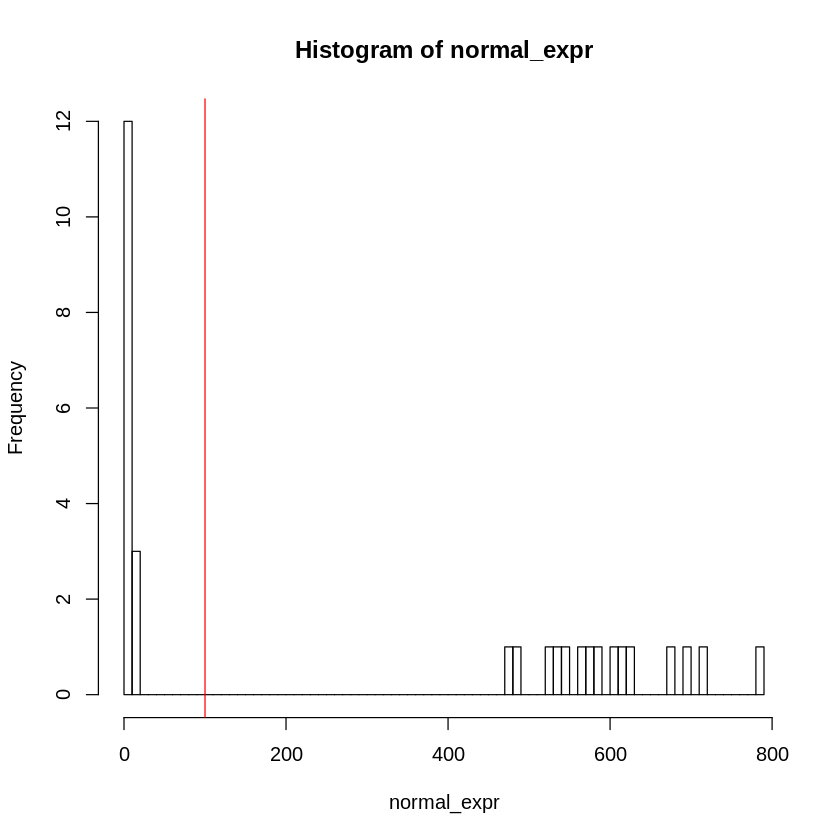

In [40]:
nexp<-cbind(normal[,1],as.data.frame(normal_expr))
hist(normal_expr,breaks=100)
nexp[nexp$normal_expr>100,]
abline(v=100,col="red")

In [41]:
length(normal[which(normal_expr<100),1])
length(normal[which(normal_expr>=100),1])

[1] 15

[1] 15

In [32]:
normal[which(normal_expr>3000),1]

factor(0)
30 Levels: 18625fe4-3c19-45d9-9d7c-a295fbf83f2e ...

In [42]:
library(ggplot2)

expr       group 
1   5.928181 normal
2 471.450291 normal

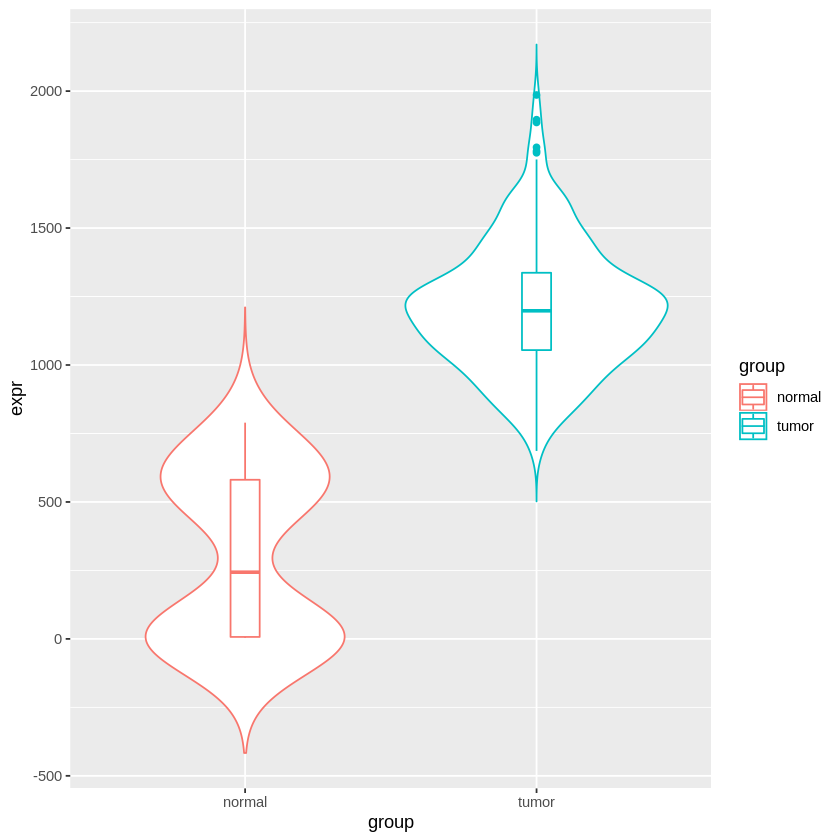

In [43]:
#bean plot
bean1<-as.data.frame(normal_expr)
bean1$group<-"normal"
bean2<-as.data.frame(tumor_expr)
bean2$group<-"tumor"
colnames(bean1)=c("expr","group")
colnames(bean2)=c("expr","group")
bean<-rbind(bean1,bean2)
bean[1:2,]
#bean$group<-as.factor(bean$group)
p<-ggplot(bean, aes(x=group, y=expr, color=group)) +
  geom_violin(trim=FALSE) +geom_boxplot(width=0.1)
p

Simpson index around 1, the distribution of herv types are different

[1] 0.9972927

[1] 0.9045637

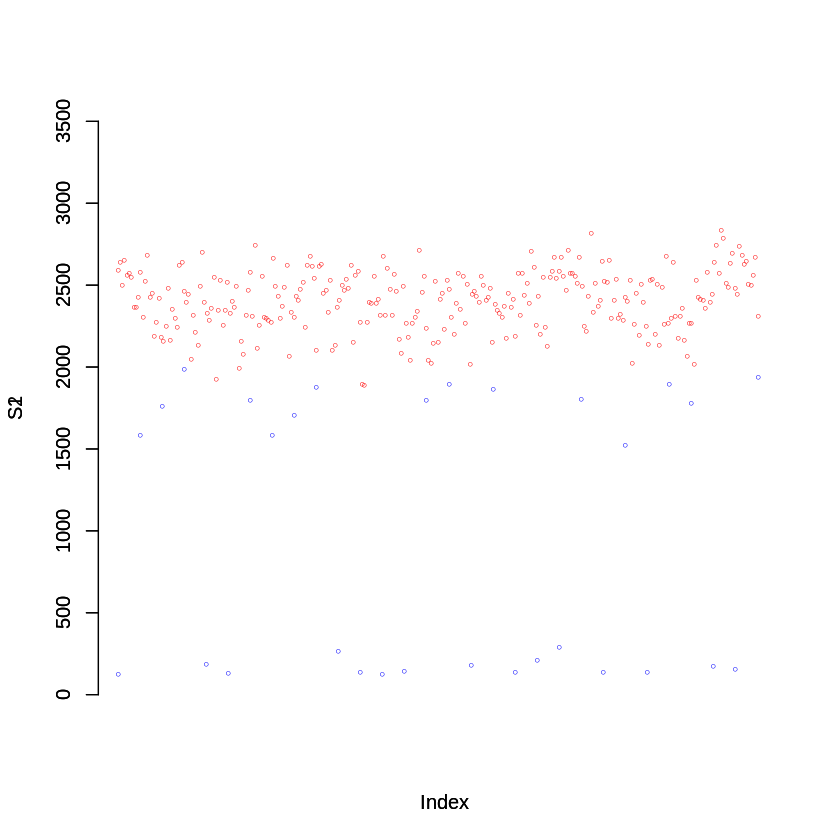

In [46]:
library(vegan)
Simpson1 <- diversity(tumor[, -1], index = "simpson")
Simpson2 <- diversity(normal[, -1], index = "simpson")
#Simpson
min(Simpson1)
min(Simpson2)
S1 <- specnumber(tumor[, -1])
S2 <- specnumber(normal[, -1])
#length(S)
#S[1:10]
plot(S1,col = "red",ylim=c(0,3500),pch="。",bty = "n", xaxt = "n")
par(new=TRUE)
plot(S2,col="blue",ylim=c(0,3500),pch="。",bty = "n", xaxt = "n")

### pan-cencer case and normal samples differential expression volcano plot

In [47]:
library("limma")
library("ggplot2")
library("dplyr")

rank by herv name ,make sure tumor1 dataset and normal1 dataset matched colmun by colmun

In [48]:
tumor1=tumor[ ,order(names(tumor))]
tumor1=tumor1[,-(dim(tumor)[2])]
dim(tumor1)
tumor1[1:2,]

[1]  281 3173

herv_1002 herv_1004 herv_1007 herv_1008 herv_1011  herv_1012
TCGA_3L_AA1B_01 0.9218119 0.1535294 0.2858402 0.1001728 0.08972242 0.1945563
TCGA_4N_A93T_01 1.2300626 0.1851294 0.0000000 0.1887753 0.16706035 0.4204419
                herv_1013  herv_1014 herv_1017 herv_1023 ⋯ herv_988  herv_989  
TCGA_3L_AA1B_01 0.06820555 2.385277  0         2.611136  ⋯ 0.2285225 0.04555859
TCGA_4N_A93T_01 0.04726540 2.159235  0         2.619696  ⋯ 0.2009652 0.02197151
                herv_990 herv_991  herv_992 herv_994  herv_995   herv_996 
TCGA_3L_AA1B_01 0        0.2146390 3.311670 0.3929908 0.18261646 0.5336121
TCGA_4N_A93T_01 0        0.1090916 4.203158 0.2560014 0.04883957 0.6266603
                herv_997   herv_999 
TCGA_3L_AA1B_01 0.02450124 0.6033674
TCGA_4N_A93T_01 0.00000000 0.7326601

In [50]:
normal1=normal[ ,order(names(normal))]
normal1=normal1
dim(normal1)
normal1

[1]   30 3174

1002_chr3:83319277-83332797 1004_chr3:84235663-84243990
1  0.0000000                   0.00000000                 
2  0.4805205                   0.02176654                 
3  0.1130499                   0.00000000                 
4  0.4314495                   0.00000000                 
5  0.0000000                   0.00000000                 
6  0.0000000                   0.00000000                 
7  0.2361888                   0.00000000                 
8  0.2698341                   0.00000000                 
9  0.5010871                   0.00000000                 
10 0.7304167                   0.03607304                 
11 0.0000000                   0.00000000                 
12 0.0000000                   0.00000000                 
13 0.0000000                   0.00000000                 
14 0.0000000                   0.00000000                 
15 0.2363272                   0.01908077                 
16 0.6306210                   0.03113626                 
17 0.0000000                   0.00000000                 
18 0.6450847                   0.00000000                 
19 0.0000000                   0.00000000                 
20 0.0000000                   0.00000000                 
21 0.0000000                   0.00000000                 
22 0.4578981                   0.00000000                 
23 0.0000000                   0.00000000                 
24 0.2490011                   0.03831256                 
25 0.0000000                   0.00000000                 
26 0.2759554                   0.02738515                 
27 0.3680062                   0.00000000                 
28 0.0000000                   0.00000000                 
29 0.0000000                   0.00000000                 
30 0.4881112                   0.06631680                 
   1007_chr3:86586074-86592748 1008_chr3:86740321-86746155
1  0                           0.00000000                 
2  0                           0.00000000                 
3  0                           0.00000000                 
4  0                           0.00000000                 
5  0                           0.00000000                 
6  0                           0.00000000                 
7  0                           0.02570204                 
8  0                           0.00000000                 
9  0                           0.02145312                 
10 0                           0.00000000                 
11 0                           0.00000000                 
12 0                           0.00000000                 
13 0                           0.00000000                 
14 0                           0.00000000                 
15 0                           0.00000000                 
16 0                           0.00000000                 
17 0                           0.00000000                 
18 0                           0.02305582                 
19 0                           0.00000000                 
20 0                           0.00000000                 
21 0                           0.00000000                 
22 0                           0.00000000                 
23 0                           0.00000000                 
24 0                           0.00000000                 
25 0                           0.00000000                 
26 0                           0.00000000                 
27 0                           0.02941145                 
28 0                           0.00000000                 
29 0                           0.00000000                 
30 0                           0.00000000                 
   1011_chr3:87656755-87665439 1012_chr3:87616309-87627728
1  0.00000000                  0.00000000                 
2  0.04320956                  0.04320956                 
3  0.02704485                  0.13042269                 
4  0.09566283                  0.18632228                 
5  0.00000000                  0.00000000         

In [20]:
t.test(tumor1[,1],normal1[,1],alternative = "two.sided")


	Welch Two Sample t-test

data:  tumor1[, 1] and normal1[, 1]
t = 60.277, df = 306.51, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6718746 0.7172217
sample estimates:
  mean of x   mean of y 
0.702550492 0.008002371 


independent samples t-test（ unpaired two sample t-test）to get p-value

In [63]:
ttest<-lapply(1:(dim(tumor1)[2]),function(x){
    r<-t.test(tumor1[,x],normal1[,x],alternative = "two.sided")
    mt<-mean(tumor1[,x])
    mn<-mean(normal1[,x])
    #herv<-colnames(tumor1)[x]
    if(mt==0){
      fc <- -1024
    }else if(mn==0){
      fc <- 1024
    }else{
      fc <- mt/mn
    }
    re<-c(mt,mn,log(fc,base=2),r$p.value)
    return(re)
  } )

Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”

Warning message:
“Removed 9 rows containing missing values (geom_point).”

hervID    avg_tumor  avg_normal   logFC    pvalue       threshold
793 herv_2381 0.05471550 2.548637e-11 30.99958 4.451279e-20 None     
409 herv_1692 0.01767570 9.200333e-12 30.83936 3.751423e-10 None     
915 herv_2620 0.07415300 2.237263e-08 21.66034 2.074106e-15 None     
78  herv_1138 0.03283595 1.017353e-07 18.30010 9.182369e-26 Up

[1] 3173    6


Down None   Up 
  16 2822  335 

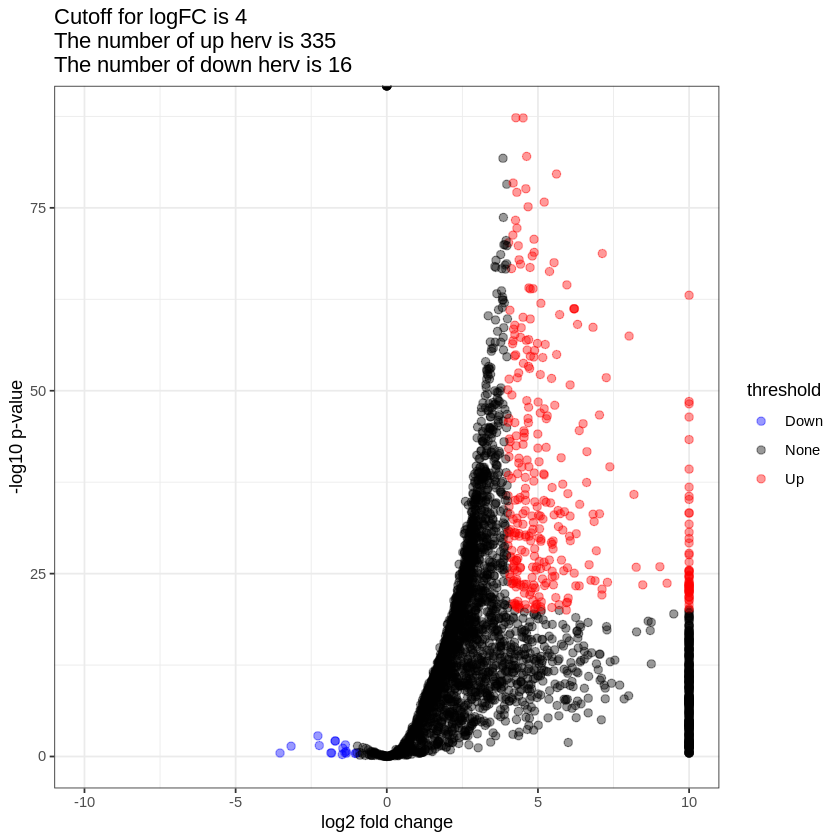

In [64]:
#valcano plot
d<-do.call(rbind, ttest)
d<-as.data.frame(d)
colnames(d)<-c("avg_tumor","avg_normal","logFC","pvalue")
d[is.na(d)]=0
#d[1:4,]
#typeof(d[1,4])
#plot(d$logFC,-log(d$pvalue,base = 10),pch=16,cex=0.8,xlim=c(-10,10))
logFC_cutoff=4

d<-d%>%mutate(threshold = ifelse(logFC >= logFC_cutoff & -log10(pvalue)>20,"Up", ifelse(logFC<=-1 , "Down", "None")))

this_tile <- paste0('Cutoff for logFC is ',round(logFC_cutoff,1),
                    '\nThe number of up herv is ',sum(d$threshold == "Up") ,
                    '\nThe number of down herv is ',sum(d$threshold == "Down")
)


d<-d%>%mutate(threshold = ifelse(logFC >= logFC_cutoff & -log10(pvalue)>20,"Up", ifelse(logFC<=-1 , "Down", "None")))
ggplot(data=d, aes(x=logFC, y=-log10(pvalue))) +
  geom_point(alpha=0.4, size=2,aes(colour = threshold)) +
  scale_colour_manual(values = c("Up"= "red", "Down"="blue",  "None"= "black"))+
  theme(legend.position = "none") +
  theme_bw()+  ggtitle( this_tile ) +
  xlim(c(-10, 10))+
  xlab("log2 fold change") + ylab("-log10 p-value")

d<-cbind(as.data.frame(colnames(tumor1)),d)
colnames(d)[1]<-"hervID"
d=d[order(-d[,4]),]
d[1:4,]
dim(d)
table(d$threshold)
#write.csv(d,file="data/pancancer_8470_534_herv_level_statistic.csv",row.names = FALSE,quote = FALSE)

66 significant differential expression hervs

In [65]:
diffherv<-d[d$logFC >= 4 & -log10(d$pvalue)>20,]
rownames(diffherv)<-diffherv$herv
diffherv<-diffherv[order(diffherv[,3]),-1]
diffherv
write.csv(diffherv,file="data/COAD_highlydiff_335herv.csv",row.names = TRUE,quote = FALSE)

avg_tumor  avg_normal logFC    pvalue       threshold
herv_1007 0.03503751 0          10       2.549326e-24 Up       
herv_1273 0.05533418 0          10       5.393325e-34 Up       
herv_1275 0.03651003 0          10       1.832246e-21 Up       
herv_1308 0.03495360 0          10       1.392071e-22 Up       
herv_1309 0.03388143 0          10       1.260528e-23 Up       
herv_1356 0.01127090 0          10       2.423502e-23 Up       
herv_1455 0.11434971 0          10       8.923129e-64 Up       
herv_1501 0.03605718 0          10       2.076676e-23 Up       
herv_1711 0.04478565 0          10       8.510322e-21 Up       
herv_1959 0.15327313 0          10       4.898034e-22 Up       
herv_1961 0.01421664 0          10       2.622357e-28 Up       
herv_2054 0.05369646 0          10       4.716140e-44 Up       
herv_2177 0.01271423 0          10       4.762774e-24 Up       
herv_2216 0.01952471 0          10       4.885657e-34 Up       
herv_2388 0.04546816 0          10       3.713496e-23 Up       
herv_2543 0.05434142 0          10       3.067396e-24 Up       
herv_2595 0.04276631 0          10       1.655992e-28 Up       
herv_2640 0.02078202 0          10       1.561634e-30 Up       
herv_2754 0.03065981 0          10       2.703442e-36 Up       
herv_2838 0.01610662 0          10       4.898837e-24 Up       
herv_3069 0.01285094 0          10       2.622086e-27 Up       
herv_3109 0.03636869 0          10       1.614070e-22 Up       
herv_3118 0.22908175 0          10       1.668963e-23 Up       
herv_3178 0.04655911 0          10       3.722169e-22 Up       
herv_3209 0.01846045 0          10       3.614883e-26 Up       
herv_3406 0.08785996 0          10       6.273151e-49 Up       
herv_3523 0.04042317 0          10       6.425914e-30 Up       
herv_3529 0.01790646 0          10       1.192384e-24 Up       
herv_3628 0.02902478 0          10       2.155875e-31 Up       
herv_3637 0.02186899 0          10       1.254927e-23 Up       
⋮         ⋮          ⋮          ⋮        ⋮            ⋮        
herv_1982 0.3477954  0.01494029 4.540958 2.356175e-44 Up       
herv_1570 0.3969658  0.01526913 4.700325 8.792744e-65 Up       
herv_1442 0.3584550  0.01574106 4.509187 5.122113e-88 Up       
herv_6092 0.2672588  0.01589291 4.071782 9.866125e-62 Up       
herv_3182 0.3198868  0.01603170 4.318562 1.635590e-52 Up       
herv_3113 0.3406921  0.01631736 4.383989 7.826065e-31 Up       
herv_3895 0.2711626  0.01643298 4.044492 1.099108e-41 Up       
herv_790  0.3045399  0.01679474 4.180550 4.029850e-79 Up       
herv_4235 0.3254958  0.01730313 4.233534 2.116682e-58 Up       
herv_3687 0.4328837  0.01768592 4.613307 1.292841e-57 Up       
herv_3066 0.8563835  0.01822034 5.554635 9.760140e-49 Up       
herv_6181 0.4124312  0.02139584 4.268751 4.784337e-88 Up       
herv_4419 0.4328266  0.02306046 4.230296 2.463679e-31 Up       
herv_4489 0.4201430  0.02320936 4.178102 1.483065e-57 Up       
herv_1475 0.9228967  0.02502921 5.204484 3.186785e-39 Up       
herv_557  0.6638475  0.02555475 4.699189 2.403304e-40 Up       
herv_3194 0.6923210  0.02678016 4.692205 1.018465e-57 Up       
herv_4772 0.5312171  0.02694703 4.301104 7.604482e-78 Up       
herv_1074 0.5687497  0.03477646 4.031611 5.669921e-71 Up       
herv_2328 0.6209403  0.03713879 4.063456 2.129508e-31 Up       
herv_1744 0.7509363  0.03809026 4.301197 2.603760e-33 Up       
herv_4825 3.1500394  0.03816021 6.367157 2.819541e-45 Up       
herv_5711 0.6774284  0.03882187 4.125127 2.017681e-67 Up       
herv_5290 4.7500742  0.04198437 6.821954 2.154485e-59 Up       
herv_1966 1.2378964  0.05438092 4.508646 9.161962e-61 Up       
herv_3254 1.1309490  0.05639180 4.325905 2.195310e-39 Up       
herv_2003 1.5837722  0.05995001 4.723461 9.170239e-54 Up       
herv_4057 3.6836702  0.07523527 5.613591 2.367266e-80 Up       
herv_6123 1.4588155  0.09007810 4.017477 2.037339e-46 Up       
herv_3171 2.6020375  0.12520215 4.377311 1.255049e-68 Up

### site-wide differential expression analysis

extract significant differential expression hervs, check each base in those herv regions with a new paired COAD dataset  
1.generate depth for each base by samtools depth  
2.extract target region depth.

In [77]:
#set up the paired sample list 
a<-read.table("data/paired-samples.txt",header=F)
a[1:4,]
length(a[[1]])

[1] 51932ec0-8c19-4c51-89ee-445e9a84c913 662a73d1-ef4d-482d-b427-7dfbca525571
[3] 13dea3ca-0454-465e-963b-9a33fafd098d afb3c381-bf54-453f-ae30-b0c1fc0e55fc
60 Levels: 0188bc58-2deb-4978-98c3-3028d6fa61f8 ...

[1] 60

In [78]:
#ps<-paste(a[[1]][1:length(a[[1]])],collapse=",")
#sprintf("%s%s%s",'"',a[[1]],'"')
#ps<-sprintf("%s%s%s",'"',a[[1]],'"')[1:length(a[[1]])]
paste(sprintf("%s%s%s",'"',a[[1]],'"')[1:length(a[[1]])],collapse=",")
#ps<-paste(sprintf("%s%s%s",'"',a[[1]],'"')[1:2],collapse=",")
#sprintf("%s%s%s",'c(',ps,')')

[1] "\"51932ec0-8c19-4c51-89ee-445e9a84c913\",\"662a73d1-ef4d-482d-b427-7dfbca525571\",\"13dea3ca-0454-465e-963b-9a33fafd098d\",\"afb3c381-bf54-453f-ae30-b0c1fc0e55fc\",\"6491c24d-93a1-42e4-8317-4999aaa264b8\",\"f61b9cd4-288e-4ab9-8ce9-61691cebbf47\",\"61f1e33f-6c84-43cb-b7d6-53701e9ace1d\",\"f6997426-b4d8-438a-b6df-00f9b5894cbd\",\"52864b61-728b-451a-a4f9-f922ca6234c2\",\"18625fe4-3c19-45d9-9d7c-a295fbf83f2e\",\"69fffc3d-f1af-450f-a1a9-979111aee040\",\"60b762e2-d8e2-4f1c-a005-65a221e035b4\",\"ed77b3cf-a543-439f-8e11-7c1fb9efb157\",\"818274b6-5103-4689-9d71-7dbff7ea62d6\",\"da61c732-293d-41aa-821c-caba4b248276\",\"891d4b89-492a-4fdf-aadb-92e5f3eb2175\",\"7d10f16e-737a-4351-ab41-9e9794b92785\",\"d1f1002d-525b-4b8b-b52f-376bf792d74e\",\"611afd21-d36c-4bcd-8de1-45d63c1d449d\",\"7219d9a8-634e-471b-82dd-9316b7b28ff2\",\"bf18b4eb-ff17-4632-a0ca-9a1c0f002156\",\"e3adceb2-6d55-4812-b972-e46d843cb261\",\"24dc3d9d-9011-4752-bf86-7308f89fd27d\",\"c77b629b-ae40-450e-8154-f4fc0b6bb6e3\",\"5dfd07db-48b5-4e2a-8079-9ff267002b6a\",\"7adde6fc-7b62-4f26-b327-d225b429823a\",\"53654dfb-9885-413a-b5bb-49b19a6a0f8c\",\"9081de60-839a-4e20-8702-02909e90cc71\",\"c4d62f18-52a9-4753-93c4-547bdbf0abea\",\"a4d598d7-896b-495c-9e6b-fef43193f9e8\",\"03d5c3cb-f41c-40fd-b1e3-2c95292c59d5\",\"8e3f0481-0e27-48aa-a178-9c17c78c05d1\",\"9d8f2b87-a61d-44db-b3e8-39a3d66e6e16\",\"e7850bdc-382d-4156-98f0-210b419bf69c\",\"7042182c-2001-45bf-baf1-5d3e6827c47d\",\"c257ee3d-8230-41f3-a5f7-948fd141a900\",\"8f96ba31-383a-4457-a85f-9bd680ece6d7\",\"d797d295-bd32-4463-9633-9d6be8690328\",\"4c21ac2c-6952-4ea6-87f0-c542f4ba8c54\",\"b92432a8-a44d-4fd6-af1c-a08f5772b73d\",\"ef7c0e3b-66ac-43c8-a220-abdffbdd2f24\",\"6e1add3f-e334-413f-a32c-3302f80db15f\",\"42c5c88c-1abd-456b-be8c-612219c1439f\",\"dbe71479-abcf-43aa-b32a-3ffab1ed1af4\",\"c3269758-60aa-4c03-9085-ef9cc5862242\",\"f54f934c-181b-4ab7-9837-99c6d6d21875\",\"8714c72b-5800-4ee7-91d2-848742701d15\",\"1bd24aac-6813-42d2-9f98-232f18e39a75\",\"8468a033-502f-4085-a7f4-de4c1922b2fa\",\"823d6de4-51f2-449c-af2f-2b7f3fd028f2\",\"0188bc58-2deb-4978-98c3-3028d6fa61f8\",\"fa5e83a0-4d1d-46fe-9f11-fb4a5bc2a87f\",\"b22d685f-f23b-4f9e-802e-9615d6ed5484\",\"ee631538-5004-4d37-b089-61458c3d638e\",\"b5e81d7c-13d2-47d2-ade8-16a9d9f52f54\",\"606e4d3b-f02f-4349-bafa-804180766782\",\"b12289f8-8259-428c-ae3e-39190e67a8d1\",\"5b225e8b-014b-4407-bc80-8566b10d9103\",\"d366f4e7-0eaf-4c32-a080-864679e1a6ef\",\"8828647d-29ac-4ef0-9085-96846c5f1731\""

In [79]:
colnames(depth)

[1] "file_ID"                             
 [2] "basepos"                             
 [3] "0188bc58-2deb-4978-98c3-3028d6fa61f8"
 [4] "03d5c3cb-f41c-40fd-b1e3-2c95292c59d5"
 [5] "13dea3ca-0454-465e-963b-9a33fafd098d"
 [6] "18625fe4-3c19-45d9-9d7c-a295fbf83f2e"
 [7] "1bd24aac-6813-42d2-9f98-232f18e39a75"
 [8] "24dc3d9d-9011-4752-bf86-7308f89fd27d"
 [9] "2d8a4267-969c-4a3a-bd89-c3ce0b9a6cf2"
[10] "42c5c88c-1abd-456b-be8c-612219c1439f"
[11] "4c21ac2c-6952-4ea6-87f0-c542f4ba8c54"
[12] "51932ec0-8c19-4c51-89ee-445e9a84c913"
[13] "52864b61-728b-451a-a4f9-f922ca6234c2"
[14] "53654dfb-9885-413a-b5bb-49b19a6a0f8c"
[15] "5b225e8b-014b-4407-bc80-8566b10d9103"
[16] "5dfd07db-48b5-4e2a-8079-9ff267002b6a"
[17] "606e4d3b-f02f-4349-bafa-804180766782"
[18] "60b762e2-d8e2-4f1c-a005-65a221e035b4"
[19] "611afd21-d36c-4bcd-8de1-45d63c1d449d"
[20] "61f1e33f-6c84-43cb-b7d6-53701e9ace1d"
[21] "6491c24d-93a1-42e4-8317-4999aaa264b8"
[22] "662a73d1-ef4d-482d-b427-7dfbca525571"
[23] "69fffc3d-f1af-450f-a1a9-979111aee040"
[24] "6e1add3f-e334-413f-a32c-3302f80db15f"
[25] "7042182c-2001-45bf-baf1-5d3e6827c47d"
[26] "7219d9a8-634e-471b-82dd-9316b7b28ff2"
[27] "7adde6fc-7b62-4f26-b327-d225b429823a"
[28] "7d10f16e-737a-4351-ab41-9e9794b92785"
[29] "818274b6-5103-4689-9d71-7dbff7ea62d6"
[30] "823d6de4-51f2-449c-af2f-2b7f3fd028f2"
[31] "8468a033-502f-4085-a7f4-de4c1922b2fa"
[32] "85ab069a-51ec-42ed-8e01-3f41791dc3b1"
[33] "8714c72b-5800-4ee7-91d2-848742701d15"
[34] "8828647d-29ac-4ef0-9085-96846c5f1731"
[35] "891d4b89-492a-4fdf-aadb-92e5f3eb2175"
[36] "8e3f0481-0e27-48aa-a178-9c17c78c05d1"
[37] "8f96ba31-383a-4457-a85f-9bd680ece6d7"
[38] "9081de60-839a-4e20-8702-02909e90cc71"
[39] "9b2dd3c7-9101-4fb1-bc2c-17d5e24f6bfb"
[40] "9d8f2b87-a61d-44db-b3e8-39a3d66e6e16"
[41] "a1da668f-e62b-4b39-b1de-be6df71496ad"
[42] "a4d598d7-896b-495c-9e6b-fef43193f9e8"
[43] "ad1cc824-7bbc-4883-96da-55e51d1b6f0d"
[44] "afb3c381-bf54-453f-ae30-b0c1fc0e55fc"
[45] "b12289f8-8259-428c-ae3e-39190e67a8d1"
[46] "b22d685f-f23b-4f9e-802e-9615d6ed5484"
[47] "b5e81d7c-13d2-47d2-ade8-16a9d9f52f54"
[48] "b92432a8-a44d-4fd6-af1c-a08f5772b73d"
[49] "bf18b4eb-ff17-4632-a0ca-9a1c0f002156"
[50] "c1c3ed06-d423-46bf-8b43-77f7817c59bd"
[51] "c257ee3d-8230-41f3-a5f7-948fd141a900"
[52] "c3269758-60aa-4c03-9085-ef9cc5862242"
[53] "c4d62f18-52a9-4753-93c4-547bdbf0abea"
[54] "c6b5b416-69f6-4782-b8a4-a399759b652f"
[55] "c77b629b-ae40-450e-8154-f4fc0b6bb6e3"
[56] "d1f1002d-525b-4b8b-b52f-376bf792d74e"
[57] "d366f4e7-0eaf-4c32-a080-864679e1a6ef"
[58] "d797d295-bd32-4463-9633-9d6be8690328"
[59] "da61c732-293d-41aa-821c-caba4b248276"
[60] "dbe71479-abcf-43aa-b32a-3ffab1ed1af4"
[61] "e0bb69be-e9d2-491d-87fa-dec9cb70c368"
[62] "e3adceb2-6d55-4812-b972-e46d843cb261"
[63] "e7850bdc-382d-4156-98f0-210b419bf69c"
[64] "ed77b3cf-a543-439f-8e11-7c1fb9efb157"
[65] "ee631538-5004-4d37-b089-61458c3d638e"
[66] "ef7c0e3b-66ac-43c8-a220-abdffbdd2f24"
[67] "f54f934c-181b-4ab7-9837-99c6d6d21875"
[68] "f61b9cd4-288e-4ab9-8ce9-61691cebbf47"
[69] "f6997426-b4d8-438a-b6df-00f9b5894cbd"
[70] "f815284b-74a2-4ad8-9f1b-aa1ec54fe579"
[71] "fa5e83a0-4d1d-46fe-9f11-fb4a5bc2a87f"

In [80]:
depth<-read.table("data/hdiffherv_region_COAD_335herv.txt",header =T,check.names=FALSE)
depth<-depth[,c("file_ID","basepos","51932ec0-8c19-4c51-89ee-445e9a84c913","662a73d1-ef4d-482d-b427-7dfbca525571","13dea3ca-0454-465e-963b-9a33fafd098d","afb3c381-bf54-453f-ae30-b0c1fc0e55fc","6491c24d-93a1-42e4-8317-4999aaa264b8","f61b9cd4-288e-4ab9-8ce9-61691cebbf47","61f1e33f-6c84-43cb-b7d6-53701e9ace1d","f6997426-b4d8-438a-b6df-00f9b5894cbd","52864b61-728b-451a-a4f9-f922ca6234c2","18625fe4-3c19-45d9-9d7c-a295fbf83f2e","69fffc3d-f1af-450f-a1a9-979111aee040","60b762e2-d8e2-4f1c-a005-65a221e035b4","ed77b3cf-a543-439f-8e11-7c1fb9efb157","818274b6-5103-4689-9d71-7dbff7ea62d6","da61c732-293d-41aa-821c-caba4b248276","891d4b89-492a-4fdf-aadb-92e5f3eb2175","7d10f16e-737a-4351-ab41-9e9794b92785","d1f1002d-525b-4b8b-b52f-376bf792d74e","611afd21-d36c-4bcd-8de1-45d63c1d449d","7219d9a8-634e-471b-82dd-9316b7b28ff2","bf18b4eb-ff17-4632-a0ca-9a1c0f002156","e3adceb2-6d55-4812-b972-e46d843cb261","24dc3d9d-9011-4752-bf86-7308f89fd27d","c77b629b-ae40-450e-8154-f4fc0b6bb6e3","5dfd07db-48b5-4e2a-8079-9ff267002b6a","7adde6fc-7b62-4f26-b327-d225b429823a","53654dfb-9885-413a-b5bb-49b19a6a0f8c","9081de60-839a-4e20-8702-02909e90cc71","c4d62f18-52a9-4753-93c4-547bdbf0abea","a4d598d7-896b-495c-9e6b-fef43193f9e8","03d5c3cb-f41c-40fd-b1e3-2c95292c59d5","8e3f0481-0e27-48aa-a178-9c17c78c05d1","9d8f2b87-a61d-44db-b3e8-39a3d66e6e16","e7850bdc-382d-4156-98f0-210b419bf69c","7042182c-2001-45bf-baf1-5d3e6827c47d","c257ee3d-8230-41f3-a5f7-948fd141a900","8f96ba31-383a-4457-a85f-9bd680ece6d7","d797d295-bd32-4463-9633-9d6be8690328","4c21ac2c-6952-4ea6-87f0-c542f4ba8c54","b92432a8-a44d-4fd6-af1c-a08f5772b73d","ef7c0e3b-66ac-43c8-a220-abdffbdd2f24","6e1add3f-e334-413f-a32c-3302f80db15f","42c5c88c-1abd-456b-be8c-612219c1439f","dbe71479-abcf-43aa-b32a-3ffab1ed1af4","c3269758-60aa-4c03-9085-ef9cc5862242","f54f934c-181b-4ab7-9837-99c6d6d21875","8714c72b-5800-4ee7-91d2-848742701d15","1bd24aac-6813-42d2-9f98-232f18e39a75","8468a033-502f-4085-a7f4-de4c1922b2fa","823d6de4-51f2-449c-af2f-2b7f3fd028f2","0188bc58-2deb-4978-98c3-3028d6fa61f8","fa5e83a0-4d1d-46fe-9f11-fb4a5bc2a87f","b22d685f-f23b-4f9e-802e-9615d6ed5484","ee631538-5004-4d37-b089-61458c3d638e","b5e81d7c-13d2-47d2-ade8-16a9d9f52f54","606e4d3b-f02f-4349-bafa-804180766782","b12289f8-8259-428c-ae3e-39190e67a8d1","5b225e8b-014b-4407-bc80-8566b10d9103","d366f4e7-0eaf-4c32-a080-864679e1a6ef","8828647d-29ac-4ef0-9085-96846c5f1731")]
dim(depth)
depth[1:4,]

[1] 2154056      62

file_ID                      basepos 51932ec0-8c19-4c51-89ee-445e9a84c913
1 4417_chr16:86312898-86314868 1       0                                   
2 4417_chr16:86312898-86314868 2       0                                   
3 4417_chr16:86312898-86314868 3       0                                   
4 4417_chr16:86312898-86314868 4       0                                   
  662a73d1-ef4d-482d-b427-7dfbca525571 13dea3ca-0454-465e-963b-9a33fafd098d
1 0                                    0                                   
2 0                                    0                                   
3 0                                    0                                   
4 0                                    0                                   
  afb3c381-bf54-453f-ae30-b0c1fc0e55fc 6491c24d-93a1-42e4-8317-4999aaa264b8
1 0                                    0                                   
2 0                                    0                                   
3 0                                    0                                   
4 0                                    0                                   
  f61b9cd4-288e-4ab9-8ce9-61691cebbf47 61f1e33f-6c84-43cb-b7d6-53701e9ace1d
1 0                                    0                                   
2 0                                    0                                   
3 0                                    0                                   
4 0                                    0                                   
  f6997426-b4d8-438a-b6df-00f9b5894cbd ⋯ 0188bc58-2deb-4978-98c3-3028d6fa61f8
1 0                                    ⋯ 0                                   
2 0                                    ⋯ 0                                   
3 0                                    ⋯ 0                                   
4 0                                    ⋯ 0                                   
  fa5e83a0-4d1d-46fe-9f11-fb4a5bc2a87f b22d685f-f23b-4f9e-802e-9615d6ed5484
1 0                                    0                                   
2 0                                    0                                   
3 0                                    0                                   
4 0                                    0                                   
  ee631538-5004-4d37-b089-61458c3d638e b5e81d7c-13d2-47d2-ade8-16a9d9f52f54
1 0                                    0                                   
2 0                                    0                                   
3 0                                    0                                   
4 0                                    0                                   
  606e4d3b-f02f-4349-bafa-804180766782 b12289f8-8259-428c-ae3e-39190e67a8d1
1 0                                    0                                   
2 0                                    0                                   
3 0                                    0                                   
4 0                                    0                                   
  5b225e8b-014b-4407-bc80-8566b10d9103 d366f4e7-0eaf-4c32-a080-864679e1a6ef
1 0                                    0                                   
2 0                                    0                                   
3 0                                    1                                   
4 0                                    1                                   
  8828647d-29ac-4ef0-9085-96846c5f1731
1 0                                   
2 0                                   
3 0                                   
4 0

In [81]:
tumor<-depth[,seq(3,dim(depth)[2],by=2)]
normal<-depth[,seq(4,dim(depth)[2],by=2)]
dim(tumor)
dim(normal)
tumor[1:2,]
normal[1:2,]

[1] 2154056      30

[1] 2154056      30

51932ec0-8c19-4c51-89ee-445e9a84c913 13dea3ca-0454-465e-963b-9a33fafd098d
1 0                                    0                                   
2 0                                    0                                   
  6491c24d-93a1-42e4-8317-4999aaa264b8 61f1e33f-6c84-43cb-b7d6-53701e9ace1d
1 0                                    0                                   
2 0                                    0                                   
  52864b61-728b-451a-a4f9-f922ca6234c2 69fffc3d-f1af-450f-a1a9-979111aee040
1 0                                    0                                   
2 0                                    0                                   
  ed77b3cf-a543-439f-8e11-7c1fb9efb157 da61c732-293d-41aa-821c-caba4b248276
1 0                                    0                                   
2 0                                    0                                   
  7d10f16e-737a-4351-ab41-9e9794b92785 611afd21-d36c-4bcd-8de1-45d63c1d449d ⋯
1 0                                    0                                    ⋯
2 0                                    0                                    ⋯
  ef7c0e3b-66ac-43c8-a220-abdffbdd2f24 42c5c88c-1abd-456b-be8c-612219c1439f
1 0                                    0                                   
2 0                                    0                                   
  c3269758-60aa-4c03-9085-ef9cc5862242 8714c72b-5800-4ee7-91d2-848742701d15
1 0                                    0                                   
2 0                                    0                                   
  8468a033-502f-4085-a7f4-de4c1922b2fa 0188bc58-2deb-4978-98c3-3028d6fa61f8
1 0                                    0                                   
2 0                                    0                                   
  b22d685f-f23b-4f9e-802e-9615d6ed5484 b5e81d7c-13d2-47d2-ade8-16a9d9f52f54
1 0                                    0                                   
2 0                                    0                                   
  b12289f8-8259-428c-ae3e-39190e67a8d1 d366f4e7-0eaf-4c32-a080-864679e1a6ef
1 0                                    0                                   
2 0                                    0

662a73d1-ef4d-482d-b427-7dfbca525571 afb3c381-bf54-453f-ae30-b0c1fc0e55fc
1 0                                    0                                   
2 0                                    0                                   
  f61b9cd4-288e-4ab9-8ce9-61691cebbf47 f6997426-b4d8-438a-b6df-00f9b5894cbd
1 0                                    0                                   
2 0                                    0                                   
  18625fe4-3c19-45d9-9d7c-a295fbf83f2e 60b762e2-d8e2-4f1c-a005-65a221e035b4
1 0                                    0                                   
2 0                                    0                                   
  818274b6-5103-4689-9d71-7dbff7ea62d6 891d4b89-492a-4fdf-aadb-92e5f3eb2175
1 0                                    0                                   
2 0                                    0                                   
  d1f1002d-525b-4b8b-b52f-376bf792d74e 7219d9a8-634e-471b-82dd-9316b7b28ff2 ⋯
1 0                                    0                                    ⋯
2 0                                    0                                    ⋯
  6e1add3f-e334-413f-a32c-3302f80db15f dbe71479-abcf-43aa-b32a-3ffab1ed1af4
1 0                                    0                                   
2 0                                    0                                   
  f54f934c-181b-4ab7-9837-99c6d6d21875 1bd24aac-6813-42d2-9f98-232f18e39a75
1 0                                    0                                   
2 0                                    0                                   
  823d6de4-51f2-449c-af2f-2b7f3fd028f2 fa5e83a0-4d1d-46fe-9f11-fb4a5bc2a87f
1 0                                    0                                   
2 0                                    0                                   
  ee631538-5004-4d37-b089-61458c3d638e 606e4d3b-f02f-4349-bafa-804180766782
1 0                                    0                                   
2 0                                    0                                   
  5b225e8b-014b-4407-bc80-8566b10d9103 8828647d-29ac-4ef0-9085-96846c5f1731
1 0                                    0                                   
2 0                                    0

3.volcano plot

In [82]:
#takes around 30 mins
ttest<-lapply(1:dim(tumor)[1],function(x){
    r<-t.test(t(tumor[x,]),t(normal[x,]),paired = TRUE)
    mt<-mean(t(tumor[x,]))
    mn<-mean(t(normal[x,]))
    if((mt==0)&(mn==0)){
      fc <- 1
    }else if(mt==0){
      fc <- -1024
    }else if(mn==0){
      fc <- 1024
    }else{
      fc <- mt/mn
    }
    re<-c(mt,mn,log(fc,base=2),r$p.value)
    return(re)
  } )

Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning mess

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message in FUN(X[[i]], ...):
“NaNs produc

Warning message in FUN(X[[i]], ...):
“NaNs produced”Warning message:
“Removed 1459033 rows containing missing values (geom_point).”

herv                      pos  avg_tumor avg_normal logFC    pvalue    
1781123 5290_chrX:4458164-4464239 4872 79.23333  0.03333333 11.21493 0.03582840
1781124 5290_chrX:4458164-4464239 4873 78.53333  0.03333333 11.20212 0.03472997
1781125 5290_chrX:4458164-4464239 4874 78.33333  0.03333333 11.19845 0.03454432
1781126 5290_chrX:4458164-4464239 4875 77.93333  0.03333333 11.19106 0.03400903
        threshold
1781123 Up       
1781124 Up       
1781125 Up       
1781126 Up

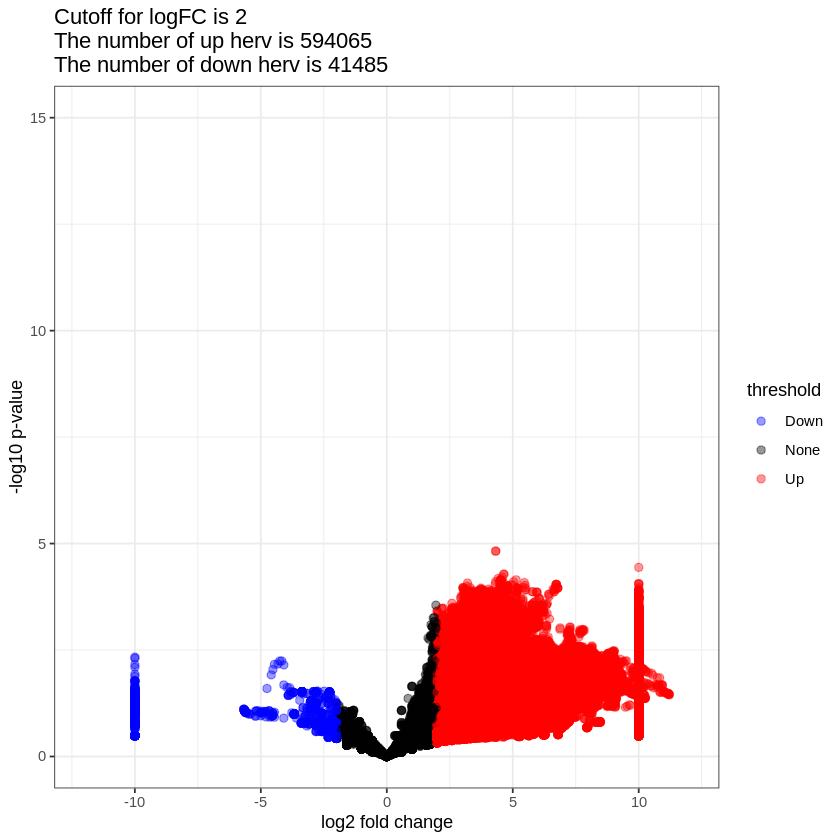

In [83]:
library("limma")
library("ggplot2")
library("dplyr")


d<-do.call(rbind, ttest)
d<-as.data.frame(d)
colnames(d)<-c("avg_tumor","avg_normal","logFC","pvalue")
d[is.na(d)]=-10
#plot(d$logFC,-log(d$pvalue,base = 10),pch=16,cex=0.8,xlim=c(-10,10))
logFC_cutoff=2

d<-d%>%mutate(threshold = ifelse(logFC >= logFC_cutoff,"Up", ifelse(logFC<=-2 , "Down", "None")))

this_tile <- paste0('Cutoff for logFC is ',round(logFC_cutoff,1),
                    '\nThe number of up herv is ',sum(d$threshold == "Up") ,
                    '\nThe number of down herv is ',sum(d$threshold == "Down")
)

ggplot(data=d, aes(x=logFC, y=-log10(pvalue))) +
  geom_point(alpha=0.4, size=2,aes(colour = threshold)) +
  scale_colour_manual(values = c("Up"= "red", "Down"="blue",  "None"= "black"))+
  theme(legend.position = "none") +
  theme_bw()+ ggtitle( this_tile ) +
  xlim(c(-12, 12)) + ylim(c(0, 15)) +
  xlab("log2 fold change") + ylab("-log10 p-value")

d<-cbind(depth[,c(1,2)],d)
colnames(d)[1]<-"herv"
colnames(d)[2]<-"pos"
d<-d[order(-d[,5]),]
d[1:4,]
write.csv(d,file="data/30paired_COAD_herv_level_statistic_COADherv.csv",row.names = FALSE,quote = FALSE)

### From site-wide to peptide(length >8)

【python script】 run with python3